In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [5]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Understanding Data

In [6]:
df.shape

(252, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [21]:
z=df.iloc[:,1:4]
z 

,BodyFat,Age,Weight
0,12.3,23,154.25
1,6.1,22,173.25
2,25.3,22,154.00
3,10.4,26,184.75
4,28.7,24,184.25
...,...,...,...
247,11.0,70,134.25
248,33.6,72,201.00
249,29.3,72,186.75
250,26.0,72,190.75


In [9]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [10]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

Draw appropriate plots to find evidence to the following facts (Properly comment a small explanation about each plot after obtaining the relevant outputs).

1. The distribution of the response variable of the problem.

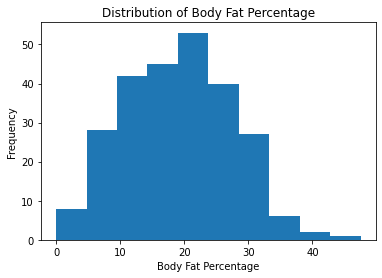

In [12]:
import matplotlib.pyplot as plt

# create a histogram of the bodyfat variable
plt.hist(df['BodyFat'])

# set the labels and title of the plot
plt.xlabel('Body Fat Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Body Fat Percentage')

# show the plot
plt.show()


The resulting histogram will show a bell-shaped curve centered around the mean value of 20, indicating that the data is normally distributed.

    Normal distribution: a bell-shaped curve with a peak at the mean value of the data.
    Skewed distribution: a distribution with a tail that extends more to one side than the other.
    Bimodal distribution: a distribution with two distinct peaks.
    Uniform distribution: a distribution where each bin has a similar count.
#### OR

import pandas as pd
df = pd.read_csv('bodyfat.csv')
df
import numpy as np
import matplotlib.pyplot as plt
#Create data

x = df.iloc[:,2]
y = df.iloc[:,1]
#Plot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot in response variable')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. Is there multicollinearity among the predictor variables of the problem?

In [14]:
#selecting predictor variables

df1=df.drop("Density",axis=1)
df1

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [15]:
x=df1.drop("BodyFat",axis=1) 
x

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


              Age    Weight    Height      Neck     Chest   Abdomen       Hip  \
Age      1.000000 -0.012746 -0.171645  0.113505  0.176450  0.230409 -0.050332   
Weight  -0.012746  1.000000  0.308279  0.830716  0.894191  0.887995  0.940884   
Height  -0.171645  0.308279  1.000000  0.253710  0.134892  0.087813  0.170394   
Neck     0.113505  0.830716  0.253710  1.000000  0.784835  0.754077  0.734958   
Chest    0.176450  0.894191  0.134892  0.784835  1.000000  0.915828  0.829420   
Abdomen  0.230409  0.887995  0.087813  0.754077  0.915828  1.000000  0.874066   
Hip     -0.050332  0.940884  0.170394  0.734958  0.829420  0.874066  1.000000   
Thigh   -0.200096  0.868694  0.148436  0.695697  0.729859  0.766624  0.896410   
Knee     0.017516  0.853167  0.286053  0.672405  0.719496  0.737179  0.823473   
Ankle   -0.105058  0.613685  0.264744  0.477892  0.482988  0.453223  0.558387   
Biceps  -0.041162  0.800416  0.207816  0.731146  0.727907  0.684983  0.739273   
Forearm -0.085056  0.630301 

<AxesSubplot:>

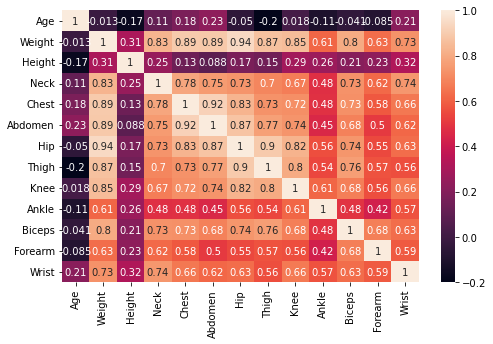

In [18]:
# multicollinearity plot


import seaborn as sns #plotting the correlation matrix
corr = x.corr() 
print(corr)
plt.figure(figsize=(8,5))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True )

From the above coorelation plot we can see that Chest is strongly correlated with Abdomen, Hip strongly correlated with Thigh and Weigh..........

3. Does neck circumference have a relationship with the response variable of the problem?

In [22]:
target=pd.DataFrame(df.BodyFat,columns=["BodyFat"])
target

,BodyFat
0,12.3
1,6.1
2,25.3
3,10.4
4,28.7
...,...
247,11.0
248,33.6
249,29.3
250,26.0


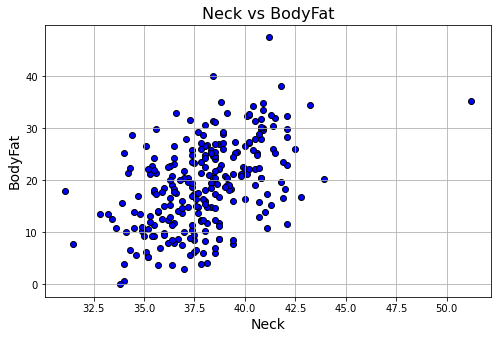

In [24]:
import matplotlib.pyplot as plt # to plot scatter plots


plt.figure(figsize=(8,5))
plt.title("Neck vs BodyFat",fontsize=16)
plt.scatter(x=df1.iloc[:,4],y=target,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("Neck",fontsize=14)
plt.ylabel('BodyFat',fontsize=14)
plt.show()

linear relationship

b. Build the regression model as explained above to predict the body fat percentage (comment the R squared value after the model).

In [25]:
x=x
y=target

In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [27]:
predictions = lm.predict(x)
print(predictions[0:5])

[[16.15278087]
 [ 8.84370386]
 [18.55676806]
 [11.92145524]
 [27.29107828]]


### R² of the model

In [28]:
lm.score(x,y)

0.749049969148275

R-squared is 0.749 indicating that the model explains 74.9% of the variance in the target variable.

In [30]:
lm.coef_

array([[ 0.06207865, -0.08844468, -0.06959043, -0.47060001, -0.02386415,
         0.95477346, -0.20754112,  0.23609984,  0.01528121,  0.17399537,
         0.18160242,  0.45202491, -1.6206391 ]])

In [31]:
lm.intercept_

array([-18.18848508])

c. Check whether the main regression assumptions (linearity and heteroscedasticity of the model, independence of the residuals), are satisfied in the model you built. (Properly comment a small explanation about each diagnostic plot after obtaining the relevant outputs).

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.72e-64
Time:                        19:40:45   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

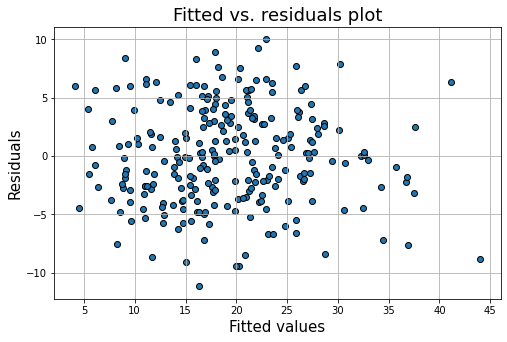

In [34]:
import statsmodels.api as sm 

from matplotlib import pyplot as plt

model=sm.OLS(endog=y,exog=sm.add_constant(x))
fitted = model.fit() 

print(fitted.summary())



plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

Residuals randomly scattered around the zero line, with no discernible pattern, Linearity assumption satisfied.

heteroscedasticity not satisgied, Not appear corn shape.

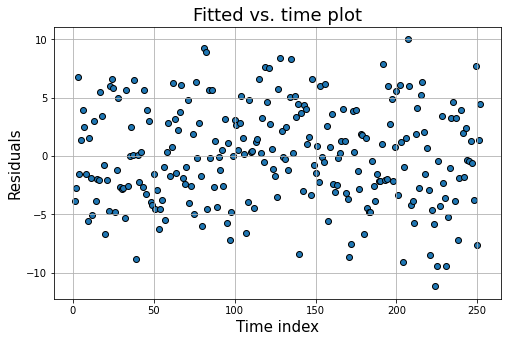

In [36]:
#correlation or error terms check independency 
plt.figure(figsize=(8,5))
p=plt.scatter(x=np.arange(1,253,1),y=fitted.resid,edgecolor='k')  #total data+1
plt.xlabel("Time index",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. time plot",fontsize=18)
plt.grid(True)
plt.show()

There is no trend or pattern in the plot, then the residuals are independent of time.